---
# <h>  <b> <center>Brazil housing</center> </b></h>
---    

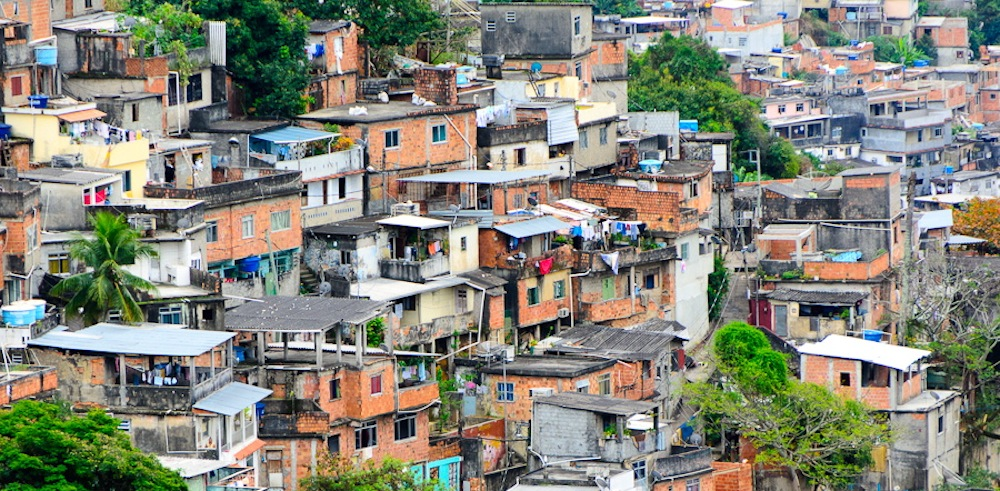

### Visual inspection of data

* Data have 13 columns (variables).
* There are  10692 rows (observations).
* Data have some missing informations

### Data Dictionary

* City: Name of the city
* Area: Property area of the house in square meters
* Rooms: Number of rooms
* Bathroom: Number of bathrooms
* Parking space: Number of parking spaces
* Floor: Number of floors in the building
* Pets: Whether animals are accepted or not
* Furniture: Whether the house is furnished or not
* HOA: Homeowner association tax
* Rent Amount: Rent amount of the property month-wise
* Property Tax: Tax on the property
* Fire Insurance: Cost of the fire insurance of the house
* Total: Total of rent amount, property tax, and fire insurance

## Importing necessary libraries
We will import required packages for the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data importing

In [2]:
df=pd.read_csv("G:\\BazilHousing\\DS1_C5_S3_BazilHousing_Data_Hackathon.csv")

### Data Overview and understanding

In [4]:
df.head()    # first five rows

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
df.tail()   # last five rows

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [6]:
# Column names
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
# Understanding of data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


# Descriptive statistics of numeric data

In [8]:
# descriptive details of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
floor,10692.0,5.067995,6.069050,0.0,1.00,3.0,8.0,301.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


# Observations:
* The data is related to descriptive statistics of numeric data.
* It includes various features like area, rooms, bathroom, parking spaces, floor, hoa, rent amount, property tax, fire insurance and total.
* Observations are based on 106920 data points.
* The data includes minimum, 25th percentile, 50th percentile, 75th percentile and maximum values.

## Descriptive details of categorical data

In [12]:
def seprate_data_types(df):                   # Seprating out the categorical and continuous variables
    categorical = []
    numerical = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 10:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            numerical.append(column)
            
    return categorical, numerical 


categorical, numerical = seprate_data_types(df)         # Calling the function
from tabulate import tabulate   # Tabulate is a package used to print the list, dict or any data sets in a proper format.
table = [categorical, numerical]
print(tabulate({"Categorical":categorical,
                "numerical": numerical}, headers = ["categorical", "numerical"]))

categorical    numerical
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


# Observations:


## Descriptive details of categorical data

In [13]:
df[['city', 'animal','furniture']].describe()

,city,animal,furniture
count,10692,10692,10692
unique,5,2,2
top,São Paulo,acept,not furnished
freq,5887,8316,8086


## Descriptive details of numerical data

In [15]:
df[[ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
     'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


##  Number of unique values

In [16]:
# checking the number of unique values in each column of the dataframe
df.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

## Missing value

In [17]:
# checking the number of missing values in each column of the dataframe
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# Exploratory Data Analysis (EDA)

# 1.Exploring "City-wise Distribution of Individuals Looking to Relocate"

Number of individuals looking to relocate in each city:
city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64


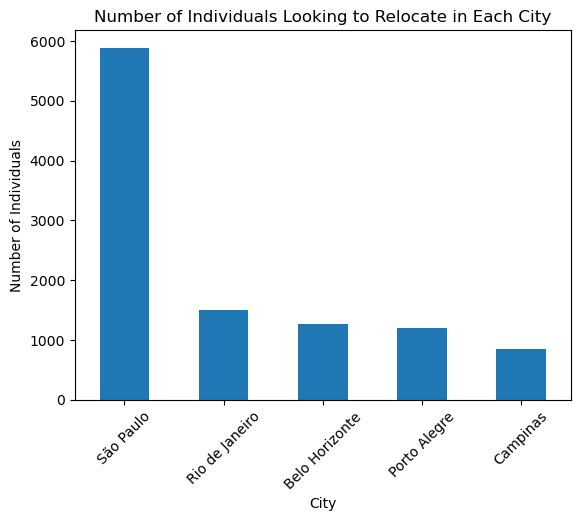

In [18]:
# Assuming 'city' is the column you want to analyze
city_counts = df['city'].value_counts()

# Display the number of individuals looking to relocate in each city
print("Number of individuals looking to relocate in each city:")
print(city_counts)

# Visualize the data using a bar chart
import matplotlib.pyplot as plt

city_counts.plot(kind='bar', rot=45, ylabel='Number of Individuals', xlabel='City', title='Number of Individuals Looking to Relocate in Each City')
plt.show()

### 2."Exploring Housing Preferences: A Univariate Analysis of Room Distribution"

Summary Statistics for 'rooms':
count    10692.000000
mean         2.506079
std          1.171266
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64


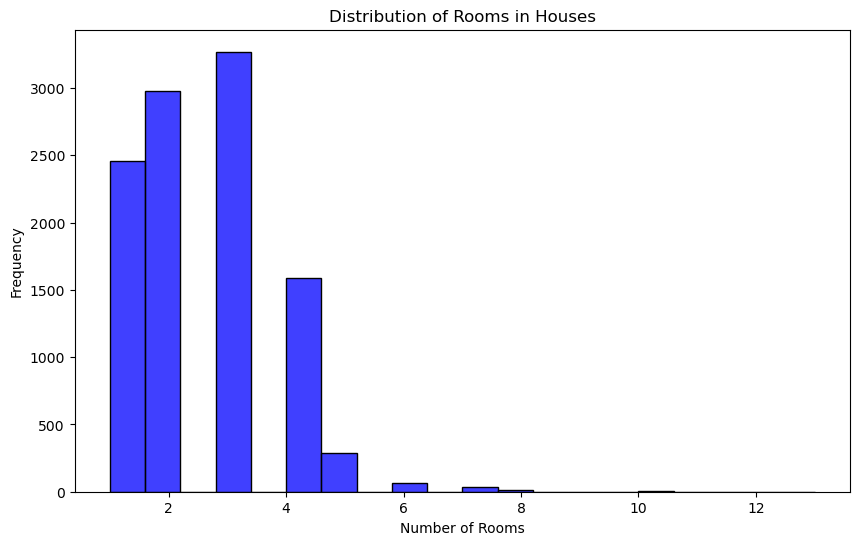

In [19]:
# Univariate analysis for the 'rooms' column
rooms_data = df['rooms']

# Display summary statistics
print("Summary Statistics for 'rooms':")
print(rooms_data.describe())

# Create a histogram to visualize the distribution of rooms
plt.figure(figsize=(10, 6))
sns.histplot(rooms_data, bins=20, kde=False, color='blue')
plt.title('Distribution of Rooms in Houses')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

###  3.Exploring the Distribution of Bathroom Counts in Considered Houses

count    10692.000000
mean         2.236813
std          1.407198
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64


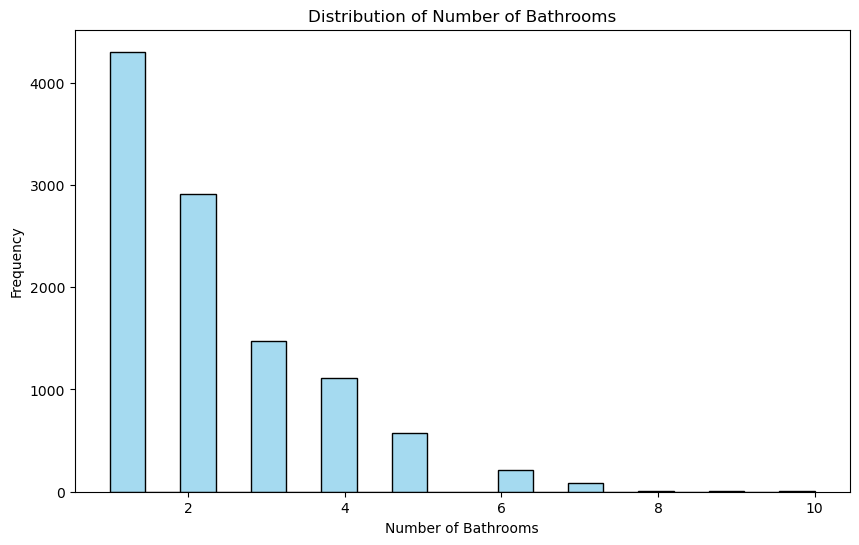

In [20]:
bathroom_data = df['bathroom']

# Summary statistics
print(bathroom_data.describe())

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(bathroom_data, bins=20, kde=False, color='skyblue')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()


### 4.Exploring the Desire for Houses that Accept Animals.

animal
acept        8316
not acept    2376
Name: count, dtype: int64


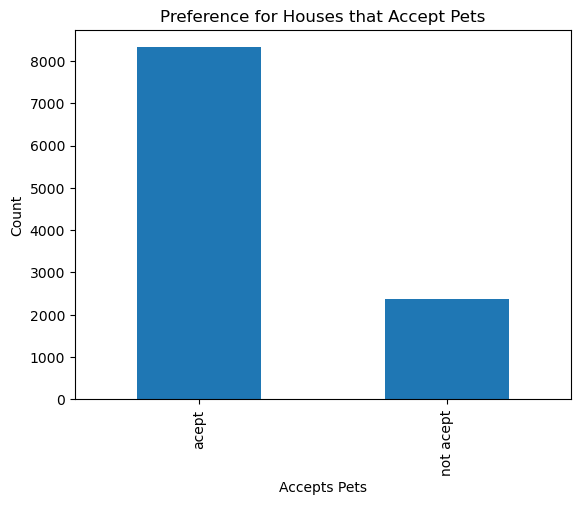

In [21]:
# Assuming df is your DataFrame
animal_counts = df['animal'].value_counts()

# Frequency Table
print(animal_counts)

# Bar Chart
animal_counts.plot(kind='bar')
plt.title('Preference for Houses that Accept Pets')
plt.xlabel('Accepts Pets')
plt.ylabel('Count')
plt.show()

### 5.Exploring Preferences for Furnished vs. Unfurnished Houses

Descriptive Statistics:
furniture
not furnished    8086
furnished        2606
Name: count, dtype: int64
furniture
not furnished    75.626637
furnished        24.373363
Name: count, dtype: float64


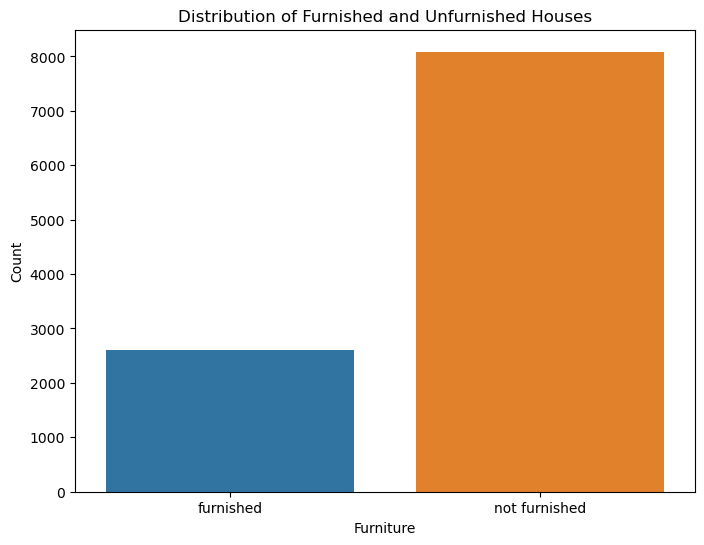

In [22]:
# Assuming 'furniture' is the column of interest
furniture_column = df['furniture']

# 1. Descriptive Statistics
furniture_counts = furniture_column.value_counts()
furniture_percentage = furniture_counts / len(furniture_column) * 100

print("Descriptive Statistics:")
print(furniture_counts)
print(furniture_percentage)

# 2. Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='furniture', data=df)
plt.title('Distribution of Furnished and Unfurnished Houses')
plt.xlabel('Furniture')
plt.ylabel('Count')
plt.show()

### 6.Exploring the Impact of Parking Spaces on Rent Amount in City Name

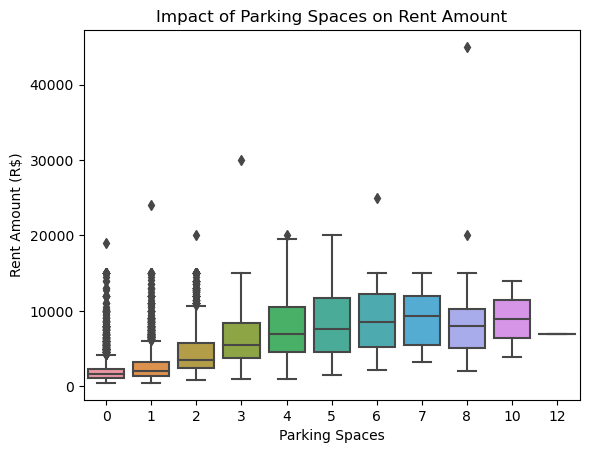

In [23]:
# Univariate analysis comparing rent amounts based on parking spaces
sns.boxplot(x='parking spaces', y='rent amount (R$)', data=df)
plt.title('Impact of Parking Spaces on Rent Amount')
plt.xlabel('Parking Spaces')
plt.ylabel('Rent Amount (R$)')
plt.show()

# 7.Exploring Renters' Preferences of Rent Amounts Across Different Cities

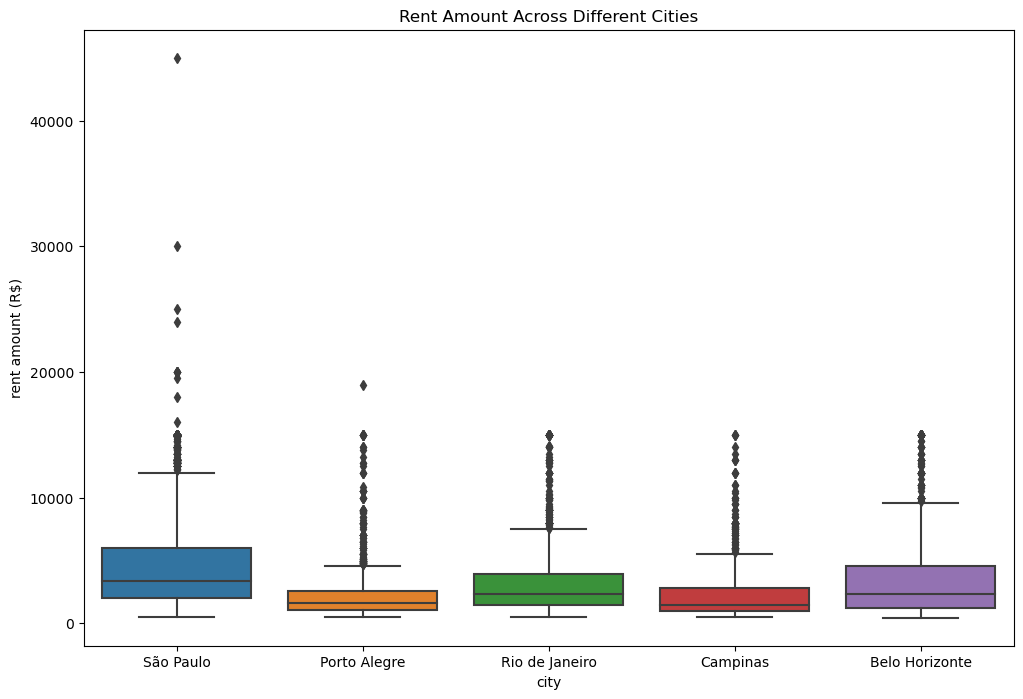

In [24]:
# Box plot of Rent Amount (R$) across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='rent amount (R$)', data=df)
plt.title('Rent Amount Across Different Cities')
plt.show()

# 7.Exporing the animal VS rent amount.

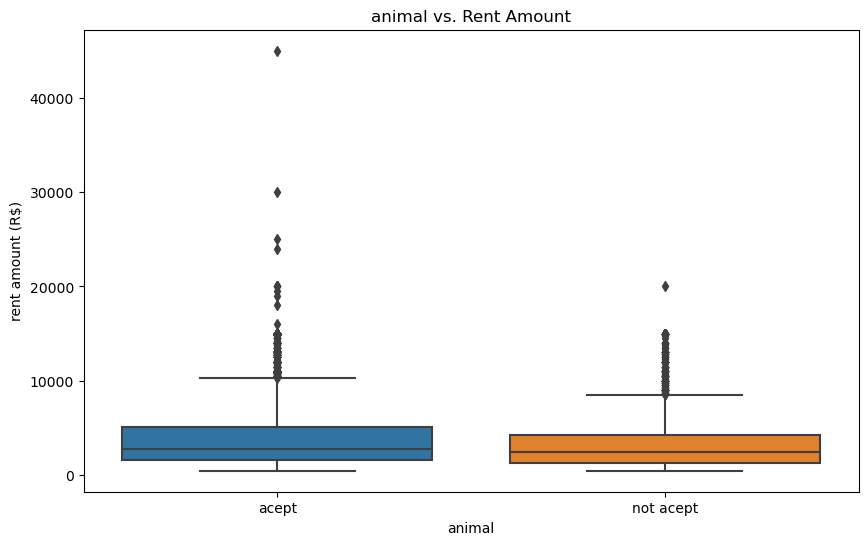

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal', y='rent amount (R$)', data=df)
plt.title(f'animal vs. Rent Amount')
plt.show()

# 8.Exploring Numerical Variables in Correlation. 

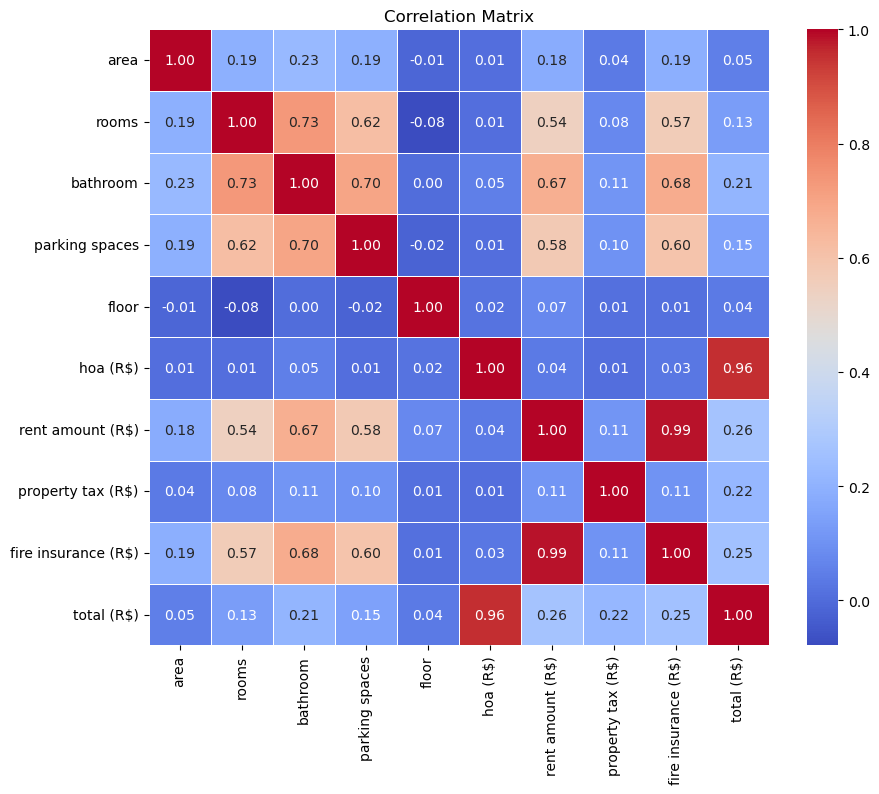

In [26]:
# Numerical Variables
numerical_vars = [ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
     'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
# Correlation Matrix
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# 9.Exporing the city and area wise rent.

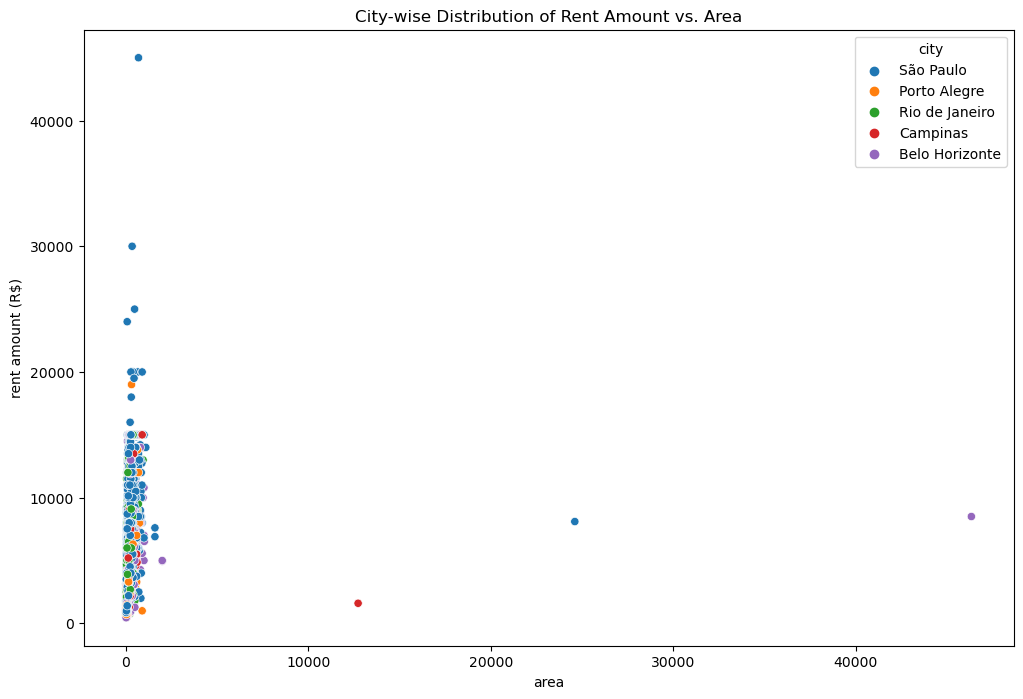

In [27]:
# City, Area, and Rent
plt.figure(figsize=(12, 8))
sns.scatterplot(x='area', y='rent amount (R$)', hue='city', data=df)
plt.title('City-wise Distribution of Rent Amount vs. Area')
plt.show()